In [53]:
import networkx as nx
import numpy as np
from collections import deque
from matplotlib import pyplot as plt

# Graphs
## Introduction
* A Graph G(V, E) is a data structure that is defined by a set of Vertices (V) and a set of Edges (E).
* Vertex (v) or node is an indivisible point, represented by the lettered components on the example graph below
* An Edge (v,u) connects vertex v and vertex u together.
* The Degree d(v) of vertex v, is the count of edges connected to it.

Example:
use networkx libary for visualisation

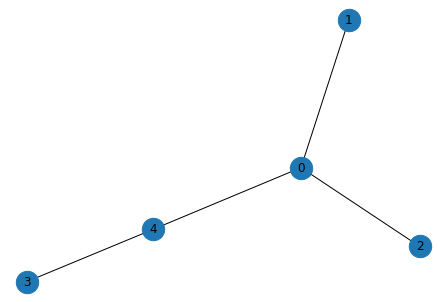

In [18]:
G = nx.Graph()
G.add_edges_from([[0,1],[0,2],[0,4],[3,4]])
nx.draw(G, node_size=500, with_labels=True)

The degree of node 0:

In [21]:
len(G[0])

3

it is connected to 3 other nodes

* Cyclic/acyclic graph
* Weighted Graphs
* Un/directed Graphs
* Connected Graph: There is a path from every node to every other node.
* Complete Graph: Every node is connected to every other node.
* Regular Graph: Each node has the same number of neighbours (degree), results in high clustering and high path length.
* Random Graph: Nodes and edges are generated at random, e.g. Erd\"os-Rényi (ER) graphs. $n$ number of nodes and $p$ the probability that there is an edge between any two nodes. Results in low clustering and small path length.

## Graph Representations

https://towardsdatascience.com/representing-graph-data-structures-6e3c19ccd677
Optimal representations try to balance
* Space Complexity $\Theta(G)$ represents how much memory is needed to hold a given graph
* The adjacency complexity $\mathcal{O}(G)$ scores how long it takes to find all the adjacent vertices to a given vertex $v$

### Edge List
The Edge List of $G$ is the literal list of edges where each edge is a list of the vertices it connects, in this case:

In [22]:
edge_list = [[0,1],[0,2],[0,4],[3,4]]

The set of nodes:

In [24]:
nodes = set([n_id for edge in edge_list for n_id in edge])
nodes

{0, 1, 2, 3, 4}

In [26]:
n_nodes = len(nodes)
n_nodes

5

Pros:
* Simple representation
* Space complexity is of $\Theta(G) = |E|$

Cons:
* Adjacency complexity is of $\mathcal{O}O(G) = |E|$, which is the worst possible value: every single edge in the list needs to be checked to find all the adjacent vertices to a given vertex $v$


### Adjacency Matrix
The Adjacency Matrix of $G$ is the square matrix where each $v$ has a corresponding column and row. If two vertices $v, u$ share an edge then the element $G[u][v]$ has a non-zero value.

In [28]:
m_graph = np.zeros((n_nodes, n_nodes), dtype=int)
m_graph

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [30]:
for edge in edge_list:
    m_graph[edge[0], edge[1]] = 1
    m_graph[edge[1], edge[0]] = 1
m_graph

array([[0, 1, 1, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0]])

Pros
* Highly interpretable. IE It's symmetrical unless its a directed graph and you can neatly store edge values in each matrix entry.
* Decent adjacency complexity of O(G) = |V|. In order to find all vertices adjacent to v, we need to scan their whole row with the adjacency matrix.

Cons:
* Terrible space complexity of Θ(G) = |V|². Here we are storing every possible vertex permutation of length 2, including each vertex paired with itself. This is more than double the maximum vertex set of possible combinations, (|V| choose 2)

### Adjacency Lists
The Adjacency List of G is a list of lists. the index of each list element represents its corresponding vertex and contains the adjacent neighbours

In [46]:
adjacency_list = [[1,2,4],[0],[0],[4],[0,3]]

This can also be a dictionary:

In [67]:
graph = {0:[1,2,4], 
     1:[0], 
     2:[0], 
     3:[4], 
     4:[0,3]}

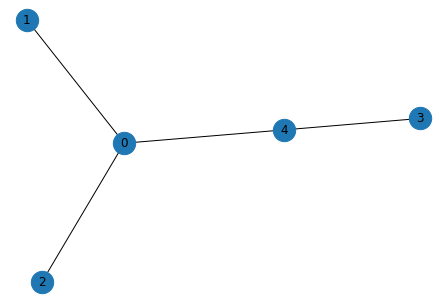

In [68]:
nx.draw(nx.from_dict_of_lists(graph), node_size=500, with_labels=True)

Pros:
* Space complexity of Θ(G) = |V|+ 2|E| We have a list for every vertex and in total these lists will store 2|E| elements since each edge will appear in both vertex lists.
* Great adjacency complexity. For a given vertex v, O(G) is equal to d(v) the Degree of v. When looking for all adjacent neighbors this is in fact the best possible value here.

### Optimal Representation
Choosing the optimal data structure to represent a given graph G is actually dependent on the density of edges within G. This can be roughly summarized as follows.

* If |E|≈|V| ie there are about as many edges as there are vertices then G is considered Sparse and an adjacency list is preferred.
* If |E|≈(|V| choose 2) ie is close to the maximum number of edges in G then it is considered Dense and the adjacency matrix is preferred.

Edge Lists are rarely used due to their poor adjacency complexity.

### Exercise - edge list for a directed graph
you are given the array paths, where paths[i] = [cityAi, cityBi] means there exists a direct path going from cityAi to cityBi. Return the destination city, that is, the city without any path outgoing to another city.

It is guaranteed that the graph of paths forms a line without any loop, therefore, there will be exactly one destination city.

Input: paths = [["London","New York"],["New York","Lima"],["Lima","Sao Paulo"]] Output: "Sao Paulo"

[["London","New York"],["New York","Lima"],["Lima","Sao Paulo"]] "Sao Paulo"

[["B","C"],["D","B"],["C","A"]] "A"

[["A","Z"]] "Z"

[["A","B"],["B","C"],["D","E"],["C","D"]] "E"

In [41]:
def find_not_outgoing(edge_list):
    have_outgoing = set([edge[0] for edge in edge_list])
    set_all_nodes = set([node for edge in edge_list for node in edge])
    return set_all_nodes - have_outgoing

In [42]:
find_not_outgoing([["A","Z"]])

{'Z'}

## Traversing Graphs
We need to traverse a graph to perform any meaningful action, like search within the graph.

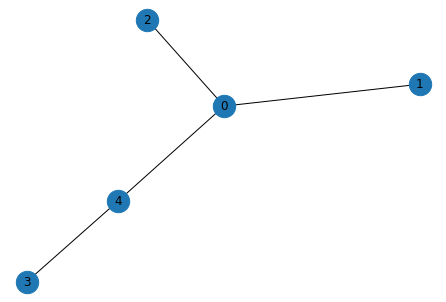

In [50]:
graph = {0:[1,2,4],
         1:[0],
         2:[0],
         3:[4],
         4:[0,3]}
nx.draw(nx.from_dict_of_lists(graph), node_size=500, with_labels=True)

### Depth-first
A depth-first traversal starts at an arbitrary root vertex and explores vertices as deeper as possible along each branch before exploring vertices at the same level.

In [51]:
def depth_first_traversal(graph, start_n_id):
    """
    returns the set of node ids that can be reached from start_n_id
    """
    seen = set()
    stack = [start_n_id]  # list of node ids to visit. Initialise with the start node
    # while stack is not empty:
    while stack:
        n_id = stack.pop()  # remove last element from the stack
        if n_id not in seen:
            seen.add(n_id)
            stack.extend(graph[n_id])
    return seen

In [52]:
depth_first_traversal(graph, 3)

{0, 1, 2, 3, 4}

### Breath-first

In [58]:
def breath_first_traversal(graph, start_n_id):
    """
    returns the set of node ids that can be reached from start_n_id
    """
    seen = set()
    queue = deque([start_n_id])  
    # list of node ids to visit. Initialise with the start node
    # we need a double ended queue to efficiently pop the first element
    # list.pop(0) is very inefficient
    
    # while stack is not empty:
    while queue:
        n_id = queue.popleft()  # remove first element from the queue
        if n_id not in seen:
            seen.add(n_id)
            queue.extend(graph[n_id])
    return seen

In [59]:
breath_first_traversal(graph, 3)

{0, 1, 2, 3, 4}

### Traversing a directed graph

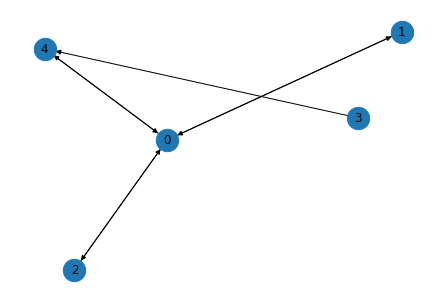

In [69]:
graph = {0:[1,2,4],
         1:[0],
         2:[0],
         3:[4],
         4:[0]}
G = nx.DiGraph()
G.add_edges_from([(n_id, nn_id) for n_id, neighbours in graph.items() for nn_id in neighbours])
nx.draw(G, node_size=500, with_labels=True)

In [72]:
depth_first_traversal(graph, 0)

{0, 1, 2, 4}

### Exercise: Find all possible paths from start node to destination node
The idea is to do Depth First Traversal of given directed graph. 

Start the traversal from source.
Keep storing the visited vertices in an array say ‘path[]’. If we reach the destination vertex, print contents of path[]. The important thing is to mark current vertices in path[] as visited also, so that the traversal doesn’t go in a cycle. 

In [136]:
graph = {0:[1,2,3],
         1:[0,2,3],
         2:[0,1],
         3:[0,1]}

In [158]:
def all_paths(start_n_id, dest_n_id, seen, path, paths):
    # Mark the current node as visited and store in path 
    seen[start_n_id]= True
    path.append(start_n_id) 

    # If current vertex is same as destination, then print 
    # current path[] 
    if start_n_id == dest_n_id:
        print(path)
        path_to_return = list(path)
    else: 
        # If current vertex is not destination 
        # Recur for all the vertices adjacent to this vertex 
        for n_id in graph[start_n_id]: 
            if seen[n_id]==False:
                all_paths(n_id, dest_n_id, seen, path) 
    # Remove current vertex from path[] and mark it as unvisited 
    path.pop() 
    seen[start_n_id]= False
    

In [159]:
n_nodes = len(graph.keys())
seen = [False]*n_nodes
print(seen)
paths = []
all_paths(1, 3, seen, [])

[False, False, False, False]
[1, 0, 3]
[1, 2, 0, 3]
[1, 3]


In [160]:
paths

[[1, 0, 3], [1, 2, 0, 3], [1, 3]]

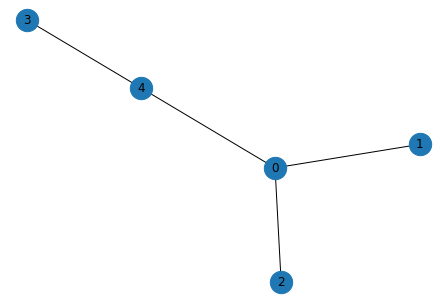

In [119]:
nx.draw(nx.from_dict_of_lists(graph), node_size=500, with_labels=True)

In [94]:
paths

[]

## Dijkstra's Shortest Path Algorithm

Let distance of start vertex to start vertex = 0
Let distance of all other vertices from start = infty

Repeat
* Visit the unvisited vertex with the smallest known distance from the start vertex
* For the current vertex, examine its unvisited neighbours
* For the current vertex, calculate distance of each beighbour from start vertex
* if the calculated distance of a vertex is less than the known distance, update the shortest  distance
* Update the previous vertex for each of the updated distances
* Add the current vertex to the list of visited vertices

until all vertices are visited

## Complete Graphs
Generate a graph where every node is connected to every other node. The graph is acyclic, which means the nodes are never connected to itself. It is undirected and unweighted, all the edge lengths are the same, e.g. =1.

In [31]:
def complete_graph(node_ids):
    """
    Generate a dictionary representation (adjacency list) of a complete graph from an iterator over the node ids
    :param node_ids 
    :return {node id: [neighbours]}
    """
    # the set() takes care of duplicates in the input iterator
    return {n_id: set([n for n in node_ids if n!=n_id]) for n_id in node_ids}

In [10]:
graph = complete_graph(range(10))
graph

{0: {1, 2, 3, 4, 5, 6, 7, 8, 9},
 1: {0, 2, 3, 4, 5, 6, 7, 8, 9},
 2: {0, 1, 3, 4, 5, 6, 7, 8, 9},
 3: {0, 1, 2, 4, 5, 6, 7, 8, 9},
 4: {0, 1, 2, 3, 5, 6, 7, 8, 9},
 5: {0, 1, 2, 3, 4, 6, 7, 8, 9},
 6: {0, 1, 2, 3, 4, 5, 7, 8, 9},
 7: {0, 1, 2, 3, 4, 5, 6, 8, 9},
 8: {0, 1, 2, 3, 4, 5, 6, 7, 9},
 9: {0, 1, 2, 3, 4, 5, 6, 7, 8}}

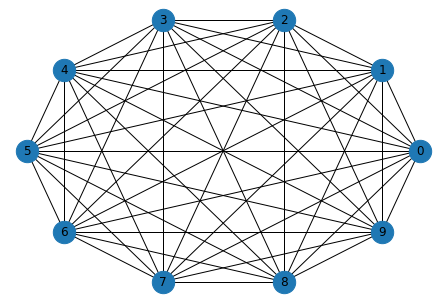

In [33]:
G = nx.from_dict_of_lists(graph)
nx.draw_circular(G, node_size=500, with_labels=True)

In a complete graph every node is connected with every other node

In [35]:
n_nodes = len(graph.keys())
all([len(neighbours)==n_nodes-1 for n_id, neighbours in graph.items()])

True

## Random Graphs - ER Graphs
The ER graph G(n,p) contains $n$ nodes, and each pair of nodes is connected by an edge with probability $p$.

In [170]:
n_nodes = 10
p = 0.3
network = [(u,v) for u in range(n_nodes) for v in range(u+1,n_nodes) if np.random.random() < p]

In [171]:
nodes = {nid: set() for nid in range(n_nodes)}
for link in network:
    nodes[link[0]].add(link[1])
    nodes[link[1]].add(link[0])
nodes = dict(nodes)

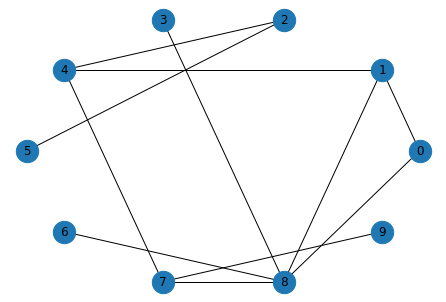

In [172]:
G = nx.Graph()
G.add_nodes_from(nodes.keys())
G.add_edges_from(network)
nx.draw_circular(G, node_size=500, with_labels=True)

## Connected Graphs

Check whether it is connected usind **Depth-First Search**: Start at node $s$. mark $s$ as "seen" and mark its neighbours. Then mark the neighbour's neighbours, etc.

Very inefficient implementation:

In [157]:
def reachable_nodes(nodes, start):
    """
    return all nodes reachable from start
    """
    seen = set()
    stack = [start]  # put starting element into the stack
    while stack:
        node = stack.pop()  # check last element of stack -> depth-first
        if node not in seen:
            seen.add(node)
            stack.extend(nodes[node])  # put the neighbours of the current node into the stack
                                       # this is what makes it so inefficient. Some of these neighbours
                                       # might have been checked already
    return seen

In [158]:
nodes

{0: {1, 2, 3, 4, 5, 6, 7, 8, 9},
 1: {0, 2, 3, 4, 5, 6, 7, 8, 9},
 2: {0, 1, 3, 4, 5, 6, 7, 8, 9},
 3: {0, 1, 2, 4, 5, 6, 7, 8, 9},
 4: {0, 1, 2, 3, 5, 6, 7, 8, 9},
 5: {0, 1, 2, 3, 4, 6, 7, 8, 9},
 6: {0, 1, 2, 3, 4, 5, 7, 8, 9},
 7: {0, 1, 2, 3, 4, 5, 6, 8, 9},
 8: {0, 1, 2, 3, 4, 5, 6, 7, 9},
 9: {0, 1, 2, 3, 4, 5, 6, 7, 8}}

In [159]:
reachable_nodes(nodes, 4)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

If all other nodes are reachable from that starting node then this is true for all nodes and the graph is connected. 

In [160]:
len(reachable_nodes(nodes, 4)) == len(nodes)

True

In [167]:
np.random.choice(list(nodes.keys()))

4

## Connectedness of Random Graphs

In [168]:
n_samples = 100
ps = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ys = []
for p in ps:
    results = []
    for _ in range(n_samples):
        network = [(u,v) for u in range(n_nodes) for v in range(u+1,n_nodes) if np.random.random() < p]
        nodes = {nid: set() for nid in range(n_nodes)}
        for link in network:
            nodes[link[0]].add(link[1])
            nodes[link[1]].add(link[0])
        nodes = dict(nodes)
        start = np.random.choice(list(nodes.keys()))
        results.append(len(reachable_nodes(nodes, start)) == len(nodes))
    ys.append(np.mean(results))

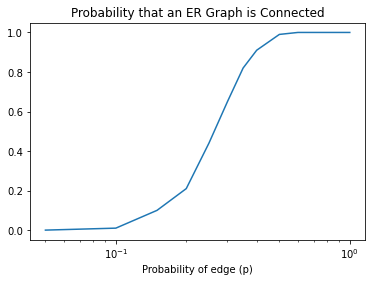

In [169]:
plt.title('Probability that an ER Graph is Connected')
plt.xlabel('Probability of edge (p)')
plt.xscale('log')
plt.plot(ps, ys)

Critical point at $\frac{\ln n}{n}=0.23$

## Models for Social Networks: Watts and Strogatz (WS) Graphs
Regular graphs (clustering and high path length) and random graphs (low clustering and small path lengths) are poor models for social networks, which combine high clustering with short path lengths.

1. Start with a regular graph with $n$ nodes and each node connected to $k$ neighbours.
2. For each edge: with probability $p$ replace the second node by a random node (without itself and avoid more than one edge between a pair of nodes).

Watts and Strogatz use ring lattices as kind of regular graphs as starting points. The $n$ nodes can be arranged in a circle with each node connected to the $k$ nearest neighbours.

In [137]:
k=4

In [140]:
n_nodes = 10
network = [(u,v%n_nodes) for u in range(n_nodes) for v in range(u+1,u+1+k//2) ]

In [141]:
network

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (2, 4),
 (3, 4),
 (3, 5),
 (4, 5),
 (4, 6),
 (5, 6),
 (5, 7),
 (6, 7),
 (6, 8),
 (7, 8),
 (7, 9),
 (8, 9),
 (8, 0),
 (9, 0),
 (9, 1)]

In [142]:
nodes = {nid: set() for nid in range(n_nodes)}
for link in network:
    nodes[link[0]].add(link[1])
    nodes[link[1]].add(link[0])
nodes = dict(nodes)

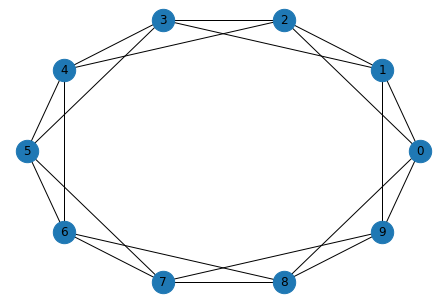

In [143]:
G = nx.Graph()
G.add_nodes_from(nodes.keys())
G.add_edges_from(network)
nx.draw_circular(G, node_size=500, with_labels=True)

## Dijkstra's Shortest Path Algorithm

Let distance of start vertex to start vertex = 0
Let distance of all other vertices from start = infty

Repeat
* Visit the unvisited vertex with the smallest known distance from the start vertex
* For the current vertex, examine its unvisited neighbours
* For the current vertex, calculate distance of each beighbour from start vertex
* if the calculated distance of a vertex is less than the known distance, update the shortest  distance
* Update the previous vertex for each of the updated distances
* Add the current vertex to the list of visited vertices

until all vertices are visited

In [161]:
from collections import deque # double ended queue
from collections import defaultdict

In [ ]:
def reachable_nodes(nodes, start):
    """
    return all nodes reachable from start
    """
    seen = set()
    stack = [start]  # put starting element into the stack
    while stack:
        node = stack.pop()  # check last element of stack -> depth-first
        if node not in seen:
            seen.add(node)
            stack.extend(nodes[node])  # put the neighbours of the current node into the stack
                                       # this is what makes it so inefficient. Some of these neighbours
                                       # might have been checked already
    return seen

In [ ]:
def reachable_nodes_bfs(nodes, start_n_id):
    seen = set()
    queue = deque([start_n_id])
    while queue:
        n_id = queue.popleft()
        if n_id not in seen:
            seen.add(n_id)
            queue.extend(nodes[n_id])
    return seen

In [174]:
def dijkstra(nodes, start_n_id):
    dists = {start_n_id: 0}
    queue = deque([start_n_id]) # unvisited neighbours to check
    while queue:
        n_id = queue.popleft() # the first unvisited neighbour
        new_dist = dists[n_id] + 1

        neighbours = nodes[n_id].difference(dists)  # all neighbours that are not already in dist

        for n in neighbours:
            dists[n] = new_dist

        queue.extend(neighbours)

    return dists

In [175]:
dijkstra(nodes, 2)

{2: 0, 4: 1, 5: 1, 1: 2, 7: 2, 0: 3, 8: 3, 9: 3, 3: 4, 6: 4}

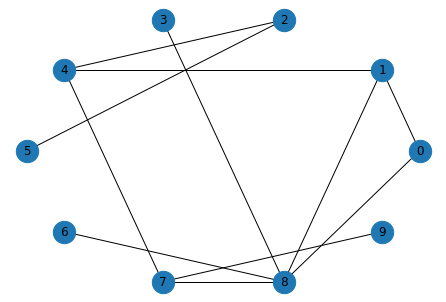

In [176]:
G = nx.Graph()
G.add_nodes_from(nodes.keys())
G.add_edges_from(network)
nx.draw_circular(G, node_size=500, with_labels=True)

## Directed Graph

In [31]:
network = [(0,1), (1,0), (0,2), (2,0), (1,2), (2,1), (1,3), (2,3), (3,4), (5,4), (5,6), (7,5), (6,8), (8,7), (8,9)]

In [24]:
nodes = {nid: {'in':[], 'out':[]} for nid in set([node for link in network for node in link])}
for link in network:
    nodes[link[0]]['out'].append(link[1])
    nodes[link[1]]['in'].append(link[0])

In [27]:
nodes

{0: {'in': [1, 2], 'out': [1, 2]},
 1: {'in': [0, 2], 'out': [0, 2, 3]},
 2: {'in': [0, 1], 'out': [0, 1, 3]},
 3: {'in': [1, 2], 'out': [4]},
 4: {'in': [3, 5], 'out': []},
 5: {'in': [7], 'out': [4, 6]},
 6: {'in': [5], 'out': [8]},
 7: {'in': [8], 'out': [5]},
 8: {'in': [6], 'out': [7, 9]},
 9: {'in': [8], 'out': []}}

## Draw

In [42]:
G = nx.Graph()
G.add_nodes_from(nodes.keys())
G.add_edges_from(network)

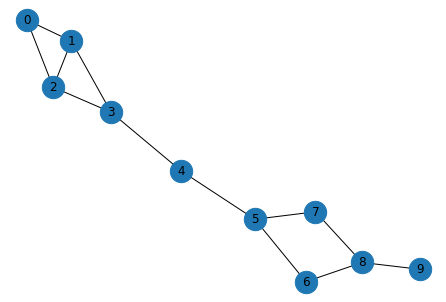

In [52]:
nx.draw(G, node_size=500, with_labels=True)